# Support Vector Machine (classification) in Python using Scikit-Learn

This program is a simple example to demonstrate how to apply a classification model using Support Vector Machine algorithm. The goal is to predict two possible classes of customers, they that will purchase or not a SUV model.

**Dataset Description**

The dataset is composed by 3 columns and 400 rows. The feature (columns) are Age, Estimated Salary and Purchases (target variable 0 or 1). Each row represents one customer.


## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # Independent Variables
y = dataset.iloc[:, -1].values # Dependent Variable

## Splitting Dataset into Training and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Building the Model - Support Vector Machine (classification)

**Definition from Scikit-Learn website**

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

From Scikit-Learn library we have a class called Support Vector Machine that contains the object Support Vector Classifier.

In [5]:
from sklearn.svm import SVC # Class and object
classifier = SVC(kernel='rbf', random_state=0)

### Training the model

In [6]:
classifier.fit(X_train, y_train)

SVC(random_state=0)

**Note**

One important aspect when we work with a Support Vector Machine is to choose the function Kernel. This function fits the model. We have some options, according with the problem some Kernel can be more efficient than others. Here we select 'RBF' kernel, it's a gaussian function. The hyper parameters must be select according with the kernel function.

Kernel types:

- Linear
- Sigmoid
- Polynomial
- RBF


### Making a Single Prediction

In [7]:
print(classifier.predict(sc.transform([[30, 80000]]))) # Here we must to apply feature scaling

[0]


### Predicting new results

In [8]:
y_pred = classifier.predict(X_test)

### Metrics (accuracy and confusion matrix)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_mat = confusion_matrix(y_test, y_pred) # Creating the confusion matrix
print(conf_mat)
print(accuracy_score(y_test, y_pred))

[[54  4]
 [ 1 21]]
0.9375


### Visualizing the results

#### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


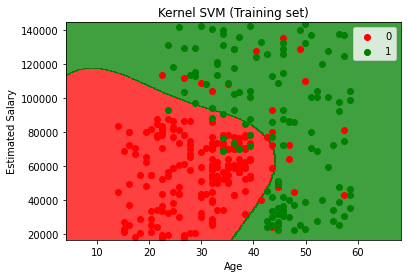

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


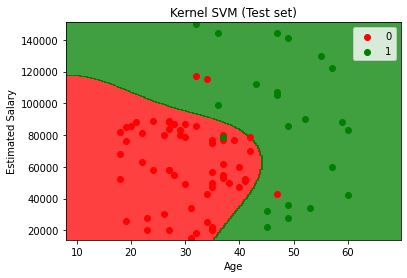

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Conclusion

In this example we employed a non-linear SVM model. We chose the Gaussian kernel to solve the problem. The accuracy is very satisfactory. As we can see the curve traced by the trained model delimits two region in a specie of Gaussian curve. Here, we can verify directly the relation between salary and purchase. The higher salary the greater the chance to purchase. The relation age and purchase is also well defined and can be visualized. For example, someone that has 45 years old and a low salary can be a costumer. But the probability to someone that has a great salary and a high age to buy is more possible. This model is a powerful tool to construct a selection model.